In [1]:
%cd /home/dongmin/23FW-NCG/jeongganbo-omr
%load_ext autoreload
%autoreload 2

/home/dongmin/userdata/jeongganbo-omr


In [2]:
from time import time
import csv
import re
import glob
import json
from random import randint, choice, uniform
import pickle
from pathlib import Path

from tqdm import tqdm
import matplotlib.pyplot as plt

import cv2
import numpy as np
import torch

from exp_utils import JeongganSynthesizer, get_img_paths

dprint = lambda d: print(json.dumps(d, indent=2))

# Jng Synthesizer

## PATHS

-_노리노:5


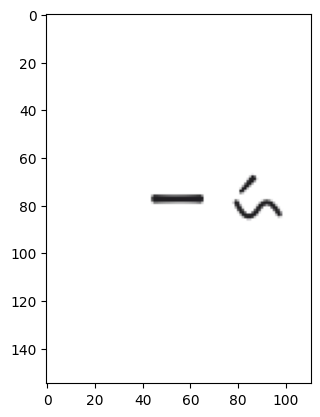

In [3]:
jng_img_path_dict = get_img_paths('test/synth/src', ['notes', 'symbols'])
jng_synth = JeongganSynthesizer(jng_img_path_dict)

settings = {
  'ornaments': True,
  'char_variant': True,
  'apply_noise': False,
  'random_symbols': False,
  'layout_elements': False,
}

label, jng_img = jng_synth(**settings)

print(label)
plt.imshow(jng_img)

In [9]:
pairs = [
  ('임_니나:2 -:4 리:6 남:7 임:9', 'daegeum_024'),
  ('청황:5', 'daegeum_055_001'),
  ('청태_나니로:5', 'daegeum_056_001'),
  ('임_니레:2 -:4 노:6 무_느니-르:8', 'daegeum_056_002'),
  ('-:10 무:14 임:15', 'daegeum_070'),
  ('같은음표:10 -:14 청태:15', 'daegeum_089_001'),
  ('청황:10 느니:11', 'daegeum_089_002'),
]

settings = {
  'char_variant': False,
  'apply_noise': False,
  'random_symbols': False,
  'layout_elements': False,
}

for label, fn in pairs:
  img = jng_synth.generate_image_by_label(label, 120, 137, **settings)

  cv2.imwrite(f'graphs/exps/{fn}.png', img)

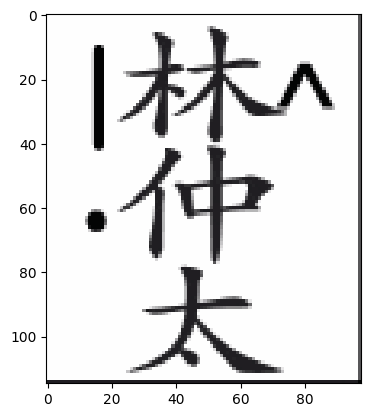

In [12]:
label = '임_노니로:1 중:3 무_느니-르_노니로:5 -:8'

# plt.imshow( cv2.imread('jeongganbo-png/splited-pngs/남창계면-이수대엽_daegeum_173.png') )
# plt.imshow( cv2.imread('jeongganbo-png/splited-pngs/남창우조-이수대엽_geomungo_83.png') )
# plt.imshow( cv2.imread('jeongganbo-png/splited-pngs/독주곡-상령산_piri_358.png') )
plt.imshow( cv2.imread('jeongganbo-png/splited-pngs/영산회상-염불도드리_piri_71.png') )

In [13]:
!cp jeongganbo-png/splited-pngs/영산회상-염불도드리_piri_71.png graphs/example_more_ornaments_002.png

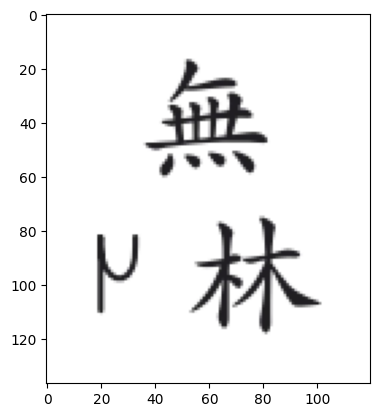

In [9]:
# label = '-:12 배이_전성:13 배이:11'
# label = '임_니나:2 -:4 리:6 남:7 임:9'
# label = '청황:2 -:4 청태_니레:6 느나:8'
label = '무:10 느니:14 임:15'

settings = {
  'apply_noise': False,
  'char_variant': False,
  'random_symbols': False,
  'layout_elements': False,
}

img = jng_synth.generate_image_by_label(label, 120, 137, **settings)

cv2.imwrite(f'graphs/example_new_div2.png', img)

plt.imshow(img)

In [42]:
labels = ['임:2 남:5 -:8', '임:5', '중:5', '-_흘림표:5', '태:2 중:5 -:8', '요성표:5', '태:5', '태_니레:2 -:4 노:6 중:8', '황:5', '-:2 -_미는표:5 배남:8']

img_w, img_h = (100, 120)

settings = {
  'apply_noise': False,
  'random_symbols': False,
  'layout_elements': False,
}

for idx, lab in enumerate(labels):
  img = jng_synth.generate_image_by_label(lab, img_w, img_h, **settings)
  cv2.imwrite(f'graphs/danbi_{str(idx+1).zfill(3)}.png', img)

## DEV

## test

### random 30 plot

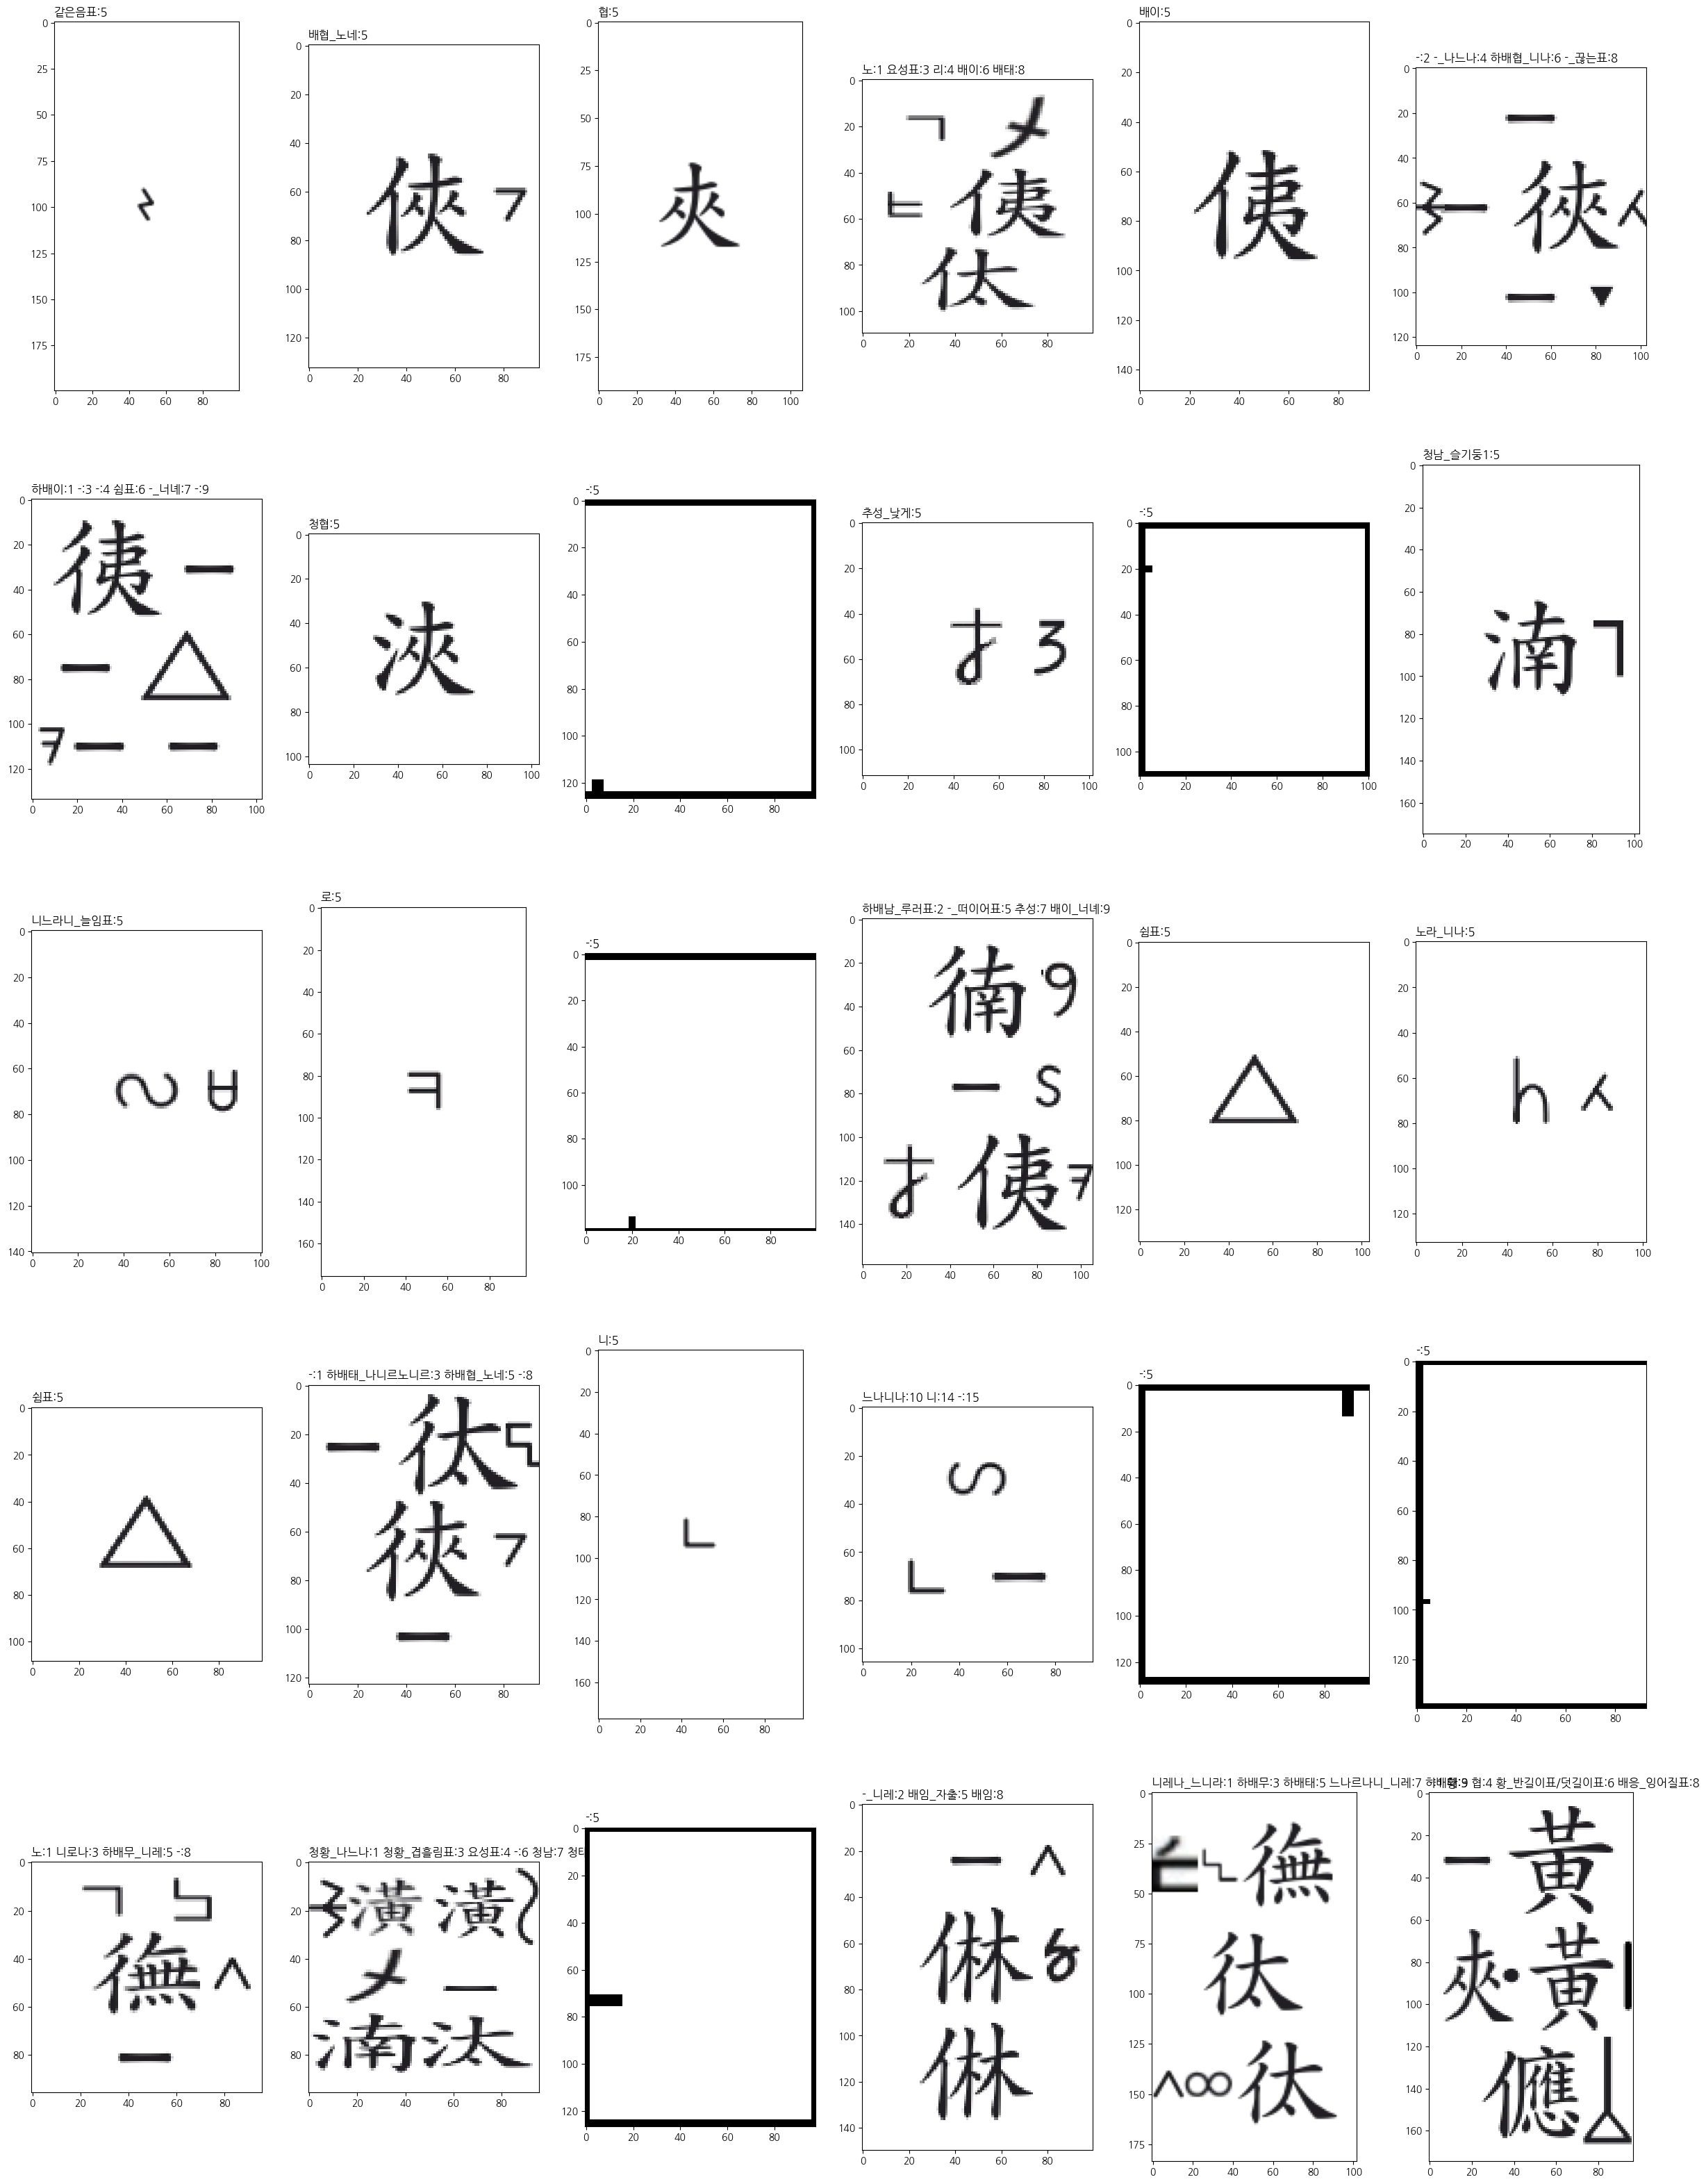

In [16]:
settings = {
  'apply_noise': False,
  'random_symbols': False,
  'layout_elements': False,
}

plt.rcParams.update({'font.family': 'NanumGothic'})
plt.figure(figsize=(30, 40))

for idx in range(1, 31):
  label, img = jng_synth(**settings)
  
  plt.subplot(5, 6, idx)
  plt.imshow(img)
  plt.title(label, loc='left')

### random 30 from test set

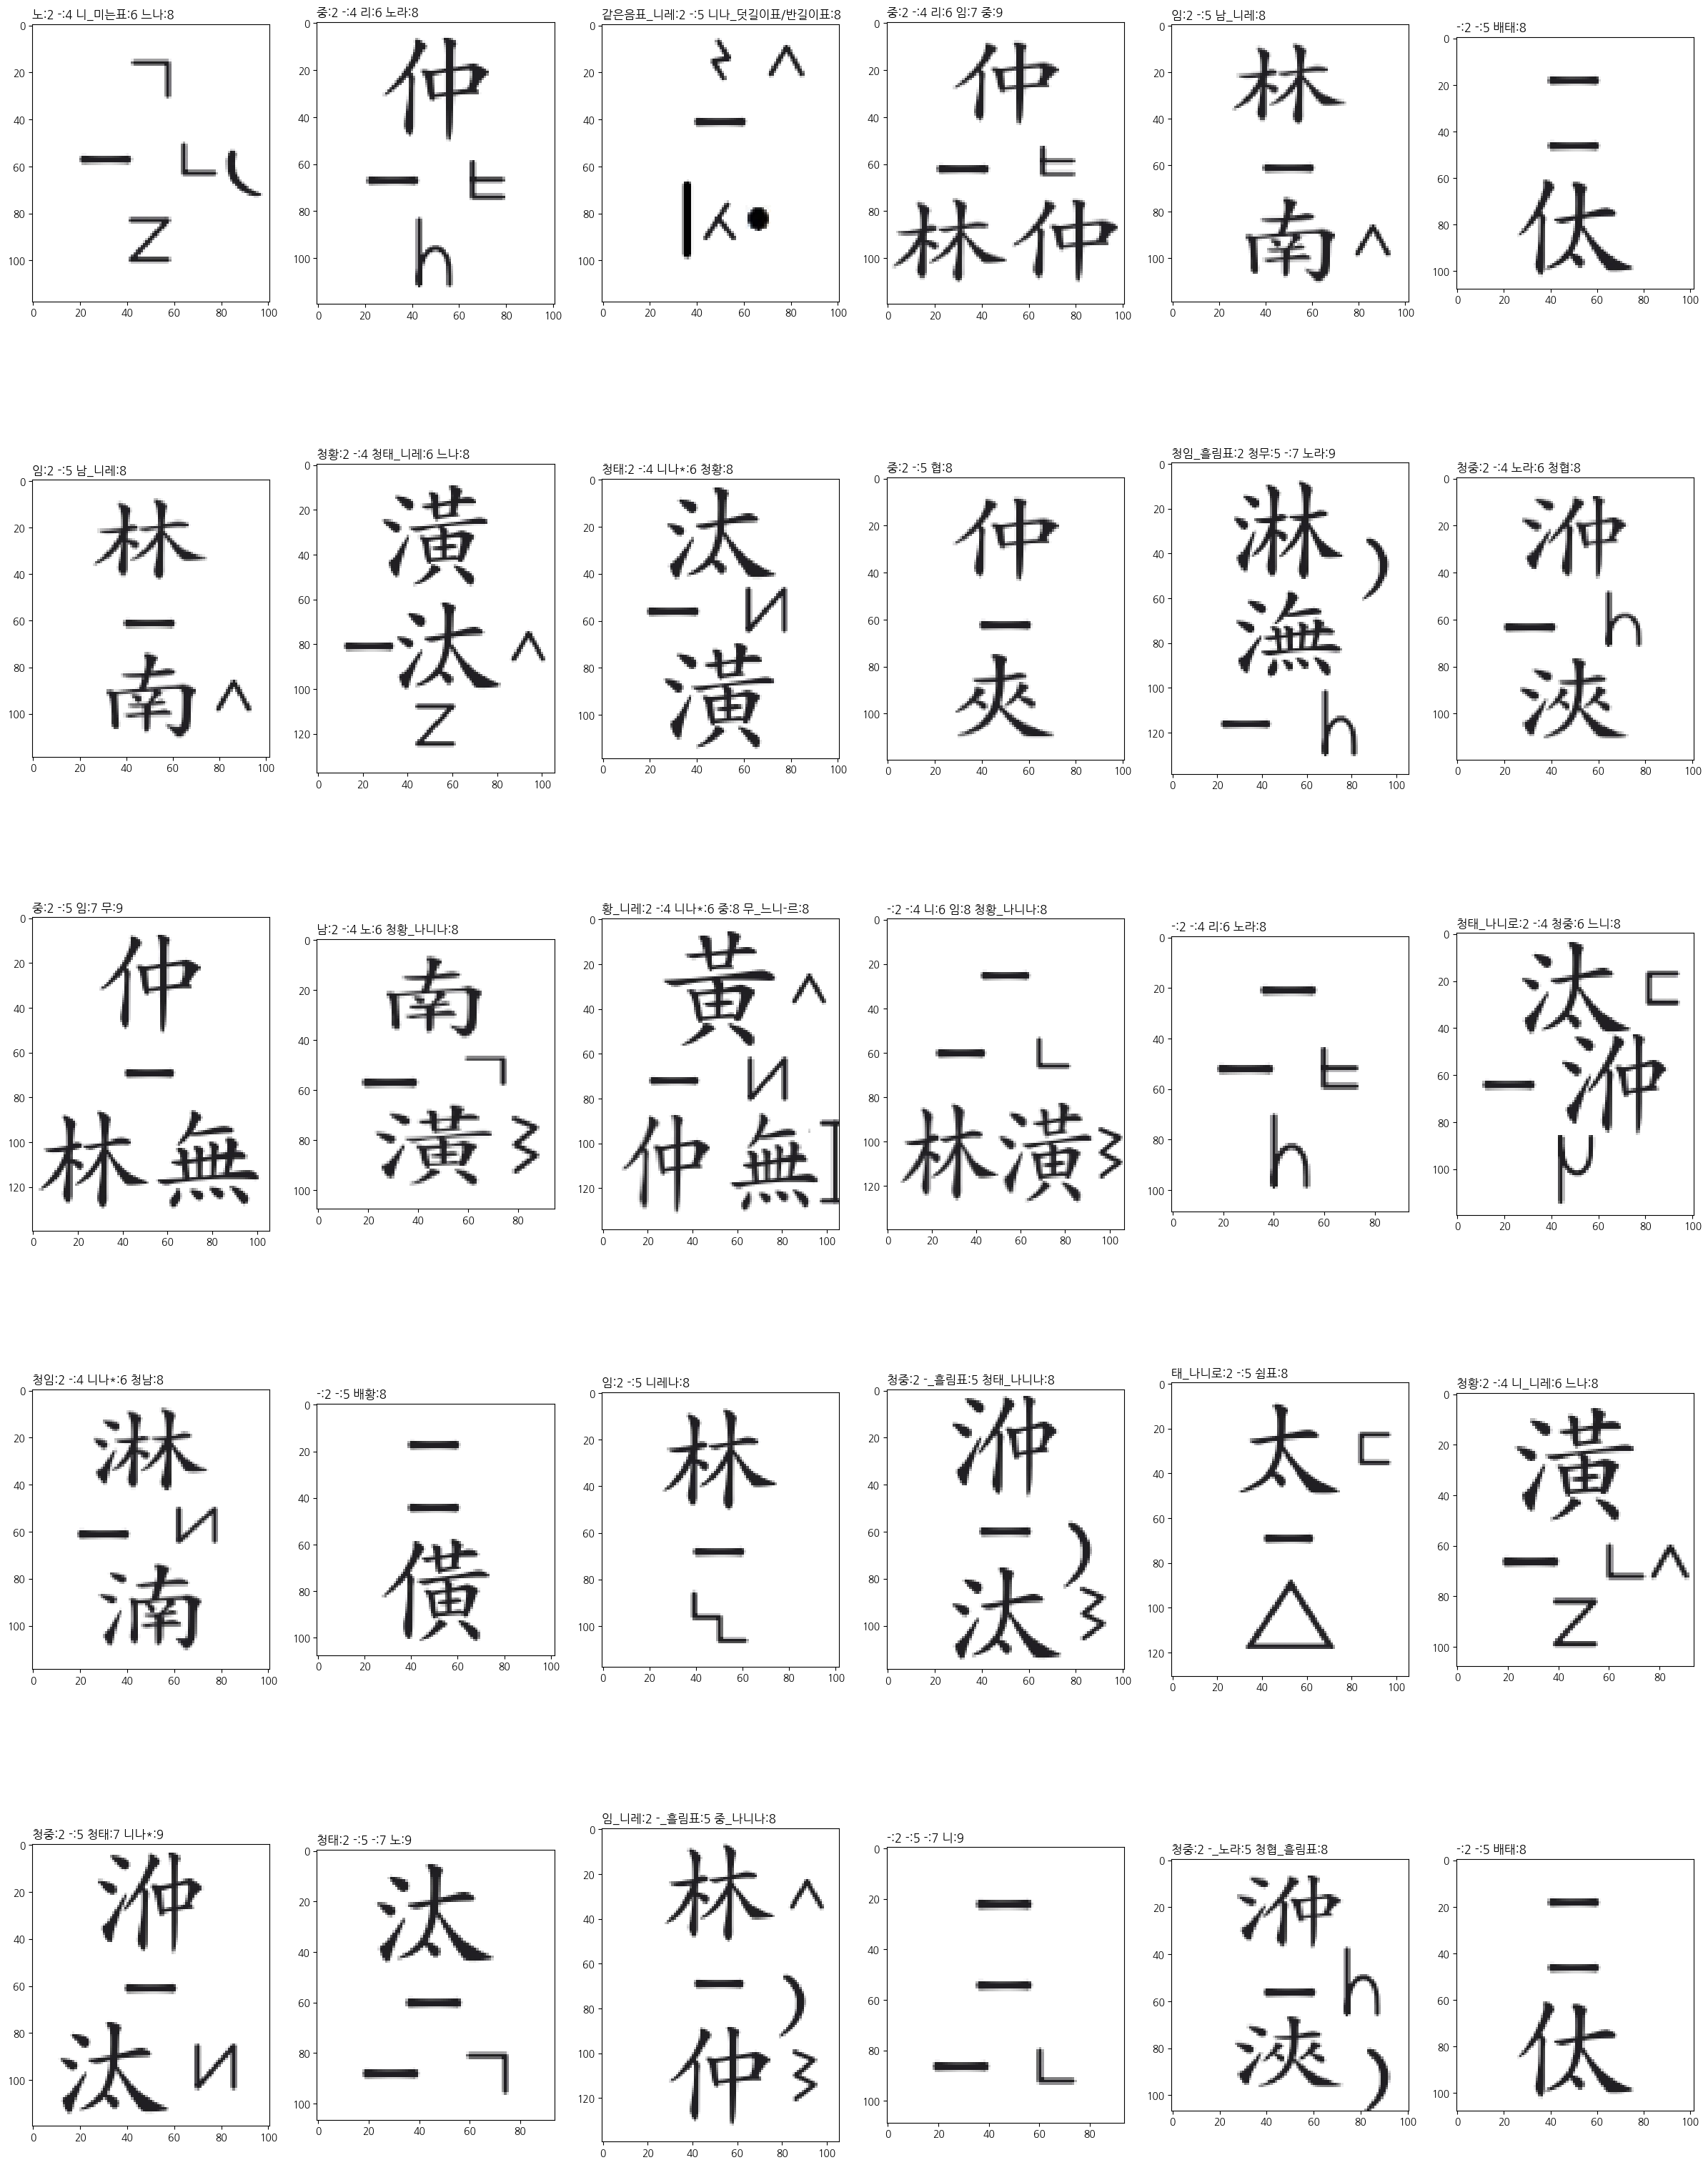

In [18]:
with open('labels_from_ls_cleaned.csv') as f:
  test_data = csv.reader(f)
  test_data = filter(lambda x: 'haegeum' not in x[0] and 'piri' not in x[0] and 'geomungo' not in x[0] and ' -' in x[1], test_data)
  test_data = list(test_data)

settings = {
  'apply_noise': False,
  'random_symbols': False,
  'layout_elements': False,
}

plt.rcParams.update({'font.family': 'NanumGothic'})
plt.figure(figsize=(30, 40))

for idx in range(1, 31):
  filename, label = choice(test_data)
  
  img_h, img_w = cv2.imread( str(Path('jeongganbo-png/splited-pngs') / filename) ).shape[:2]
  
  img = jng_synth.generate_image_by_label(label, img_w, img_h, **settings)
  plt.subplot(5, 6, idx)
  plt.imshow(img)
  plt.title(label, loc='left')

### stress test

In [19]:
import sys

NUM = 100_000

settings = {
  'apply_noise': True,
  'random_symbols': True
}

exceptions = []

for _ in tqdm(range(NUM), leave=False):
  while True:
    try:
      label, jng_img = jng_synth(**settings)
      break
    except Exception as e:
      exceptions.append((e, sys.exc_info()))

len(exceptions)

  0%|          | 0/100000 [00:00<?, ?it/s]

2

In [20]:
exceptions

[(cv2.error("OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4158: error: (-215:Assertion failed) !dsize.empty() in function 'resize'\n"),
  (cv2.error,
   cv2.error("OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4158: error: (-215:Assertion failed) !dsize.empty() in function 'resize'\n"),
   <traceback at 0x7c0751c32200>)),
 (cv2.error("OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4158: error: (-215:Assertion failed) !dsize.empty() in function 'resize'\n"),
  (cv2.error,
   cv2.error("OpenCV(4.9.0) /io/opencv/modules/imgproc/src/resize.cpp:4158: error: (-215:Assertion failed) !dsize.empty() in function 'resize'\n"),
   <traceback at 0x7c0751c08280>))]

In [29]:
import traceback

traceback.print_exception(*exceptions[0][1])

Traceback (most recent call last):
  File "/tmp/ipykernel_100576/3642462241.py", line 15, in <module>
    label, jng_img = jng_synth(**settings)
  File "/home/dongmin/userdata/jeongganbo-omr/exp_utils/jeonggan_synthesizer.py", line 56, in __call__
    label, *_, jng_img = self.generate_single_data(range_limit=range_limit, ornaments=ornaments, apply_noise=apply_noise, random_symbols=random_symbols, layout_elements=layout_elements)
  File "/home/dongmin/userdata/jeongganbo-omr/exp_utils/jeonggan_synthesizer.py", line 65, in generate_single_data
    jng_img = self.generate_image_by_label(label, img_w, img_h, apply_noise=apply_noise, random_symbols=random_symbols, layout_elements=layout_elements)
  File "/home/dongmin/userdata/jeongganbo-omr/exp_utils/jeonggan_synthesizer.py", line 170, in generate_image_by_label
    jng_img = self.generate_image_by_dict(img, jng_dict, apply_noise=apply_noise, random_symbols=random_symbols)
  File "/home/dongmin/userdata/jeongganbo-omr/exp_utils/jeonggan_s

### reconstruction test

In [4]:
test_data_filename = 'labels_from_ls_cleaned_filtered.csv'

with open(f'{test_data_filename}') as f:
  test_data = list(csv.reader(f))

len(test_data)

2057

failed:  0


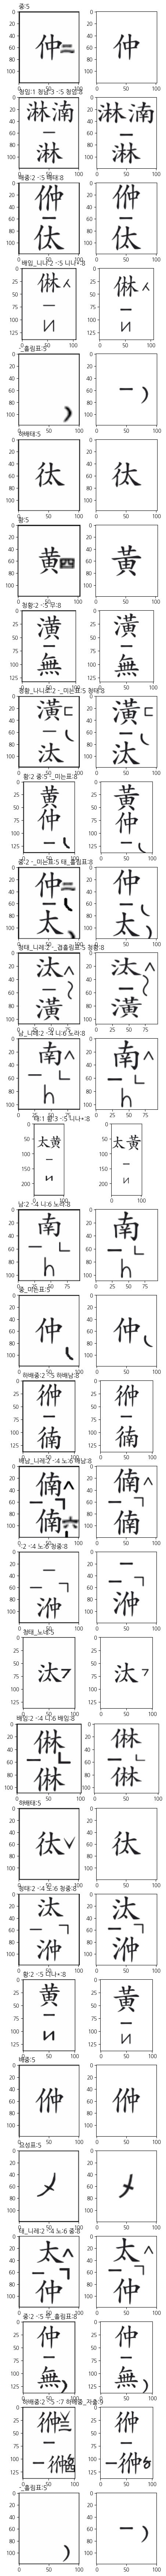

In [7]:
# Start index, if START == NONE: idx = choice()
START = None # 90
NUM = 30

self = jng_synth

settings = {
  'apply_noise': False,
  'random_symbols': False,
  'layout_elements': False,
}

res = []
failed = []

cnt = 0
while True:
  data = test_data[START + cnt] if isinstance(START, int) else choice(test_data)
  filename, label = data
  
  try:
    img_og = cv2.imread(f'jeongganbo-png/splited-pngs/{filename}')
    img_h, img_w = img_og.shape[:2]
    
    img = self.generate_image_by_label(label, img_w, img_h, **settings)
    
    res.append((label, img_og, img))
    
  except:
    failed.append((filename, label))
  
  cnt += 1
  
  if len(res) == NUM:
    break

print('failed: ', len(failed))

plt.rcParams.update({'font.family': 'NanumGothic'})
plt.figure(figsize=(5, 90))

idx = 1

for label, og, synth in res:
  plt.subplot(30, 2, idx)
  plt.imshow(og)
  plt.title(label, loc='left')
  idx+=1
  
  plt.subplot(30, 2, idx)
  plt.imshow(synth)
  idx+=1

In [118]:
failed

[(61, '남창우조-소용이_geomungo_52.png', '배중_퇴성_9:2 추성:5 -:8'),
 (61, '남창계면-이수대엽_geomungo_58.png', '배중_뜰:2 퇴성:5 -:8'),
 (61, '여민락_geomungo_378.png', '하배임_중현:5'),
 (61, '남창계면-두거_geomungo_136.png', '배임_살갱:2 -:5 -:8'),
 (61, '여민락_piri_1075.png', '퇴성_루러표:5'),
 (61, '여창계면-중거_haegeum_237.png', '배임:2 황_4:5 -:8'),
 (61, '남창계면-이수대엽_haegeum_171.png', '배임:2 황_4:5 -:8'),
 (61, '남창계면-이수대엽_geomungo_151.png', '배황:2 배황_대현:5 -:8')]